findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

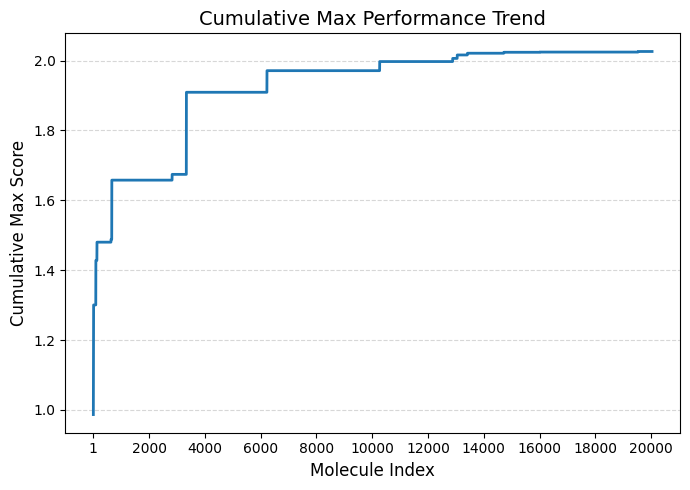

Top 10 molecules with highest scores and their index:
 Index                                                                   smiles    score
 19530 *[Si](*)(C)[Si](Cl)[Si](C)(*)[Si](C)(C)[Si](C)[Si]1CCC(*)C(C)C(C)CC(C)C1 2.026014
 16003                *[Si](C)(C)[Si](C)(C)[Si](C)(C)[Si]1CC(*)CC(C)CC(C)C(C)C1 2.024335
 16240                *[Si](C)(C)[Si](C)(C)[Si](*)(C)[Si]1C(C)C(C)CCCC(C)C(C)C1 2.024335
 16330   *[Si]([Si](C)(C)[Si](C)(C)[Si])(C)[Si](*)(C)[Si]1C(C)CCC(C)C(C)CC(C)C1 2.024335
 16518                *[Si](C)(C)[Si](C)(C)[Si](C)(C)[Si]1CCC(C)C(C)C(C)CC(C)C1 2.024335
 17957                *[Si](C)(C)[Si](C)(C)[Si](C)(C)[Si]1CCC(C)C(C)C(C)CC(*)C1 2.024335
 17981           */C=C/[Si](C)(C)[Si](C)(C)[Si](C)(*)[Si]1CCC(C)CC(C)C(C)C(C)C1 2.024335
 18048        *[Si](C)(C)[Si](C)(C)[Si](*)[Si](C)(C)[Si]1CCCC(C)C(C)C(Br)C(C)C1 2.024335
 18080                  *[Si](C)(C)[Si](C)(C)[Si](C)(C)[Si]1CCC(*)CC(C)CC(C)C1C 2.024335
 18093     *[Si](C)(C)[Si](C)(Cl)[Si](*)(C)[Si](*)(C)[Si

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

# 设置字体为 Arial，防止负号乱码
rcParams['font.sans-serif'] = ['Arial']
rcParams['axes.unicode_minus'] = False

# 读取CSV文件
df = pd.read_csv("RF+A+350+20000.csv")  # 替换为你的实际路径

# 添加序号列（从1开始）
df['Index'] = range(1, len(df) + 1)

# 计算累积最大score
df['Cumulative Max Score'] = df['score'].cummax()

# 设置x轴刻度：每隔2000个显示一次
max_index = df['Index'].max()
xticks_pos = np.arange(0, max_index + 1, 2000)
xticks_pos[0] = 1  # 保证起点为1，而不是0

# 绘图
plt.figure(figsize=(7, 5))
plt.plot(df['Index'], df['Cumulative Max Score'], linewidth=2)

# 设置x轴刻度
plt.xticks(ticks=xticks_pos)

# 坐标轴和标题
plt.xlabel("Molecule Index", fontsize=12)
plt.ylabel("Cumulative Max Score", fontsize=12)
plt.title("Cumulative Max Performance Trend", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 输出前10个最高score对应的分子信息
top10 = df.nlargest(20, 'score')[['Index', 'smiles', 'score']]
print("Top 10 molecules with highest scores and their index:")
print(top10.to_string(index=False))
# 筛选score大于2的分子
high_score_df = df[df['score'] > 2]

# 只保留smiles列，并保存到Excel
high_score_df[['smiles']].to_csv("high_score_molecules.csv", index=False)

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

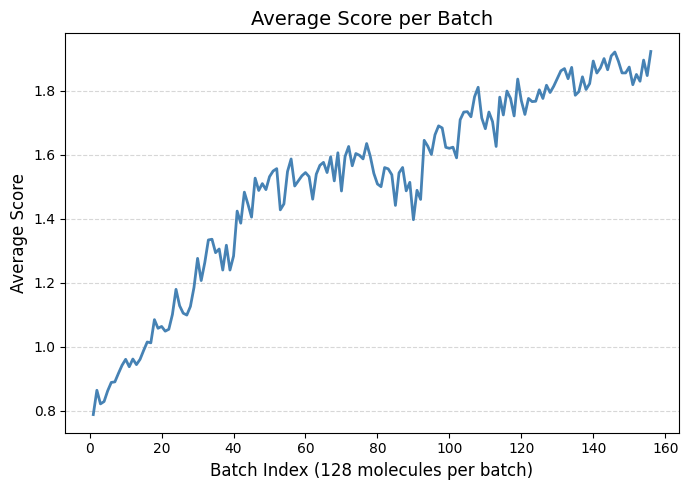

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

# 设置字体为 Arial，防止负号乱码
rcParams['font.sans-serif'] = ['Arial']
rcParams['axes.unicode_minus'] = False

# 读取CSV文件
df = pd.read_csv("RF+A+350+20000.csv")

# 添加分子索引
df['Index'] = range(1, len(df) + 1)

# 设置 batch 大小
batch_size = 128
num_batches = len(df) // batch_size

# 丢弃最后不足一个batch的部分（如你不想丢，可以改为 padding 或补0）
df_trimmed = df.iloc[:num_batches * batch_size].copy()

# 生成 batch ID
df_trimmed['Batch'] = df_trimmed.index // batch_size

# 每个 batch 求平均
batch_avg = df_trimmed.groupby('Batch')['score'].mean().reset_index()
batch_avg['Batch'] += 1  # Batch 从1开始计数

# 绘图
plt.figure(figsize=(7, 5))
plt.plot(batch_avg['Batch'], batch_avg['score'], linewidth=2, color='steelblue')

# 设置坐标轴
plt.xlabel("Batch Index (128 molecules per batch)", fontsize=12)
plt.ylabel("Average Score", fontsize=12)
plt.title("Average Score per Batch", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


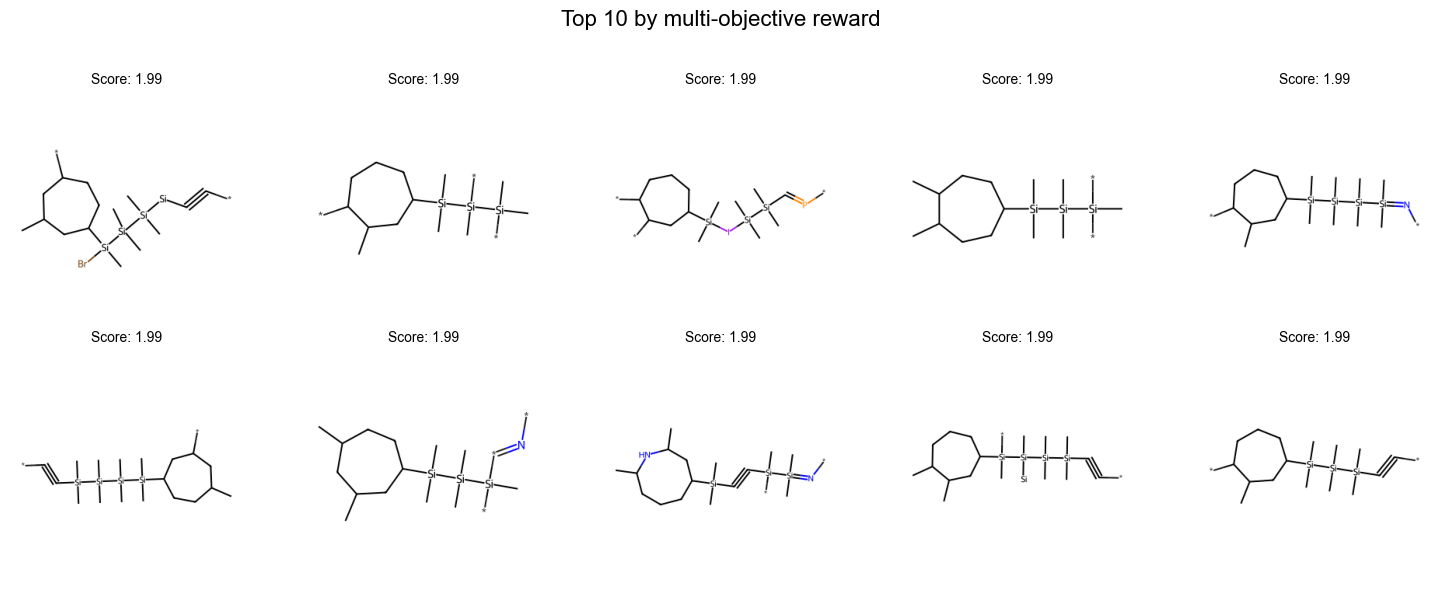

In [36]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
import numpy as np

# SMILES 和对应分数（已按你的顺序填入）
smiles_list = [
    "*C#C[Si][Si](C)(C)[Si](C)(C)[Si](C)(Br)C1CCC(*)CC(C)C1",
    "*/[Si](C)(C)[Si](*)(C)[Si](C)(C)C1CCCC(*)C(C)C1",
    "*/P=C/[Si](C)(C)[Si](C)(C)[I][Si](C)(C)C1CCCC(*)C(*)C1",
    "*/[Si](*)(C)[Si](C)(C)[Si](C)(C)C1CCC(C)C(C)CC1",
    "*N=[Si](C)(C)[Si](C)(C)[Si](C)(C)[Si](C)(C)C1CCCC(*)C(C)C1",
    "*C#C[Si](C)(C)[Si](C)(C)[Si](C)(C)[Si](C)(C)C1CCC(C)CC(*)C1",
    "*/N=*/[Si](*)(C)[Si](C)(C)[Si](C)(C)C1CCC(C)CC(C)C1",
    "*/N=[Si](C)(C)[Si](*)(C)C#C[Si](C)(C)C1CCCC(C)NC(C)C1",
    "*C#C[Si](C)(C)[Si](C)(C)[Si](C)([Si])[Si](*)(C)C1CCCC(C)C(C)C1",
    "*C#C[Si](C)(C)[Si](C)(C)[Si](C)(C)C1CCCC(*)C(C)C1"
]

scores = [1.988289, 1.988289, 1.988289, 1.986592, 1.986592, 
          1.986592, 1.986592, 1.986592, 1.986592, 1.986592]

# 转换为 RDKit 分子对象（带有通配符 * 会触发警告但通常能解析）
mols = [Chem.MolFromSmiles(smi, sanitize=False) for smi in smiles_list]

# 布局设置
n_cols = 5
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6))

# 遍历绘图
for i, (mol, score) in enumerate(zip(mols, scores)):
    row, col = divmod(i, n_cols)
    ax = axes[row][col]
    
    # 绘制 RDKit 图像到内存
    drawer = rdMolDraw2D.MolDraw2DCairo(300, 300)
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    img_bytes = drawer.GetDrawingText()
    
    # 使用 PIL 打开并展示
    img = Image.open(BytesIO(img_bytes))
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Score: {score:.2f}", fontsize=10)

# 隐藏空子图（如果有）
for j in range(i + 1, n_rows * n_cols):
    row, col = divmod(j, n_cols)
    axes[row][col].axis('off')

# 总标题
plt.suptitle("Top 10 by multi-objective reward", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


NameError: name 'scores' is not defined

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

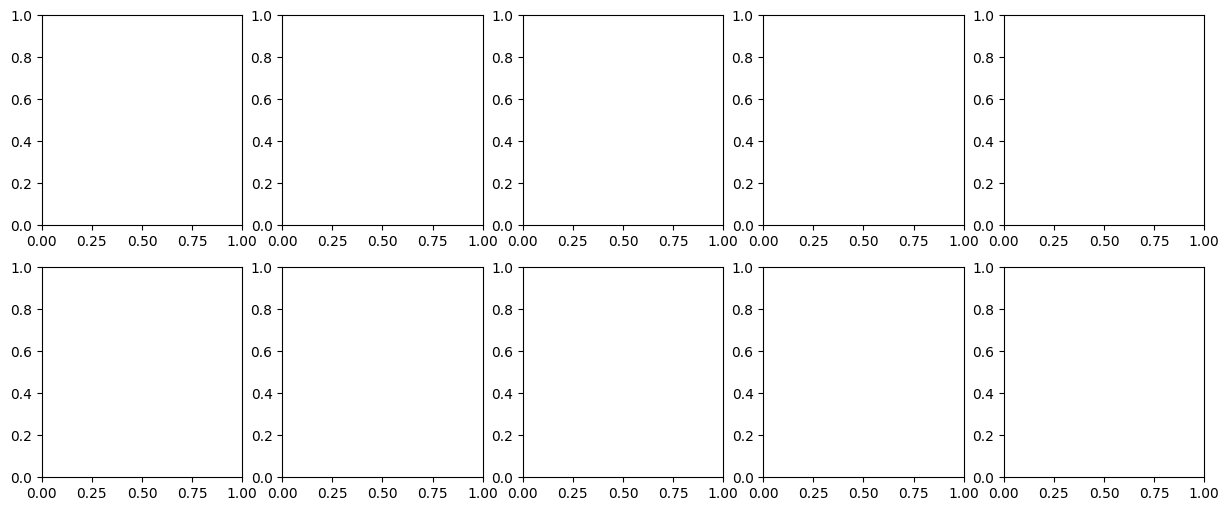

In [5]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
import numpy as np

# SMILES 和对应分数（已按你的顺序填入）
smiles_list = [
    "c1(O*)cc2c(cc1O*)C1(c3cc(C)c(C)cc3-c3cc4c(cc31)Oc1c(C#N)c(*)c(*)c(C#N)c1O4)c1ccccc1-2",
    "c1ccc2c(c1)C1(c3c-2cc2c(c3)Oc3c(c(C#N)c(*)c(*)c3C#N)O2)c2c(cc(O*)c(O*)c2)-c2cc(C)c(C)cc21",
    "c12ccccc1-c1c(cc(O*)c(O*)c1)C21c2c(cc3c(c2)Oc2c(c(C#N)c(*)c(*)c2C#N)O3)-c2c1cc(C)c(C)c2",
]

#scores = [1.988289, 1.988289, 1.988289, 1.986592, 1.986592, 
          #1.986592, 1.986592, 1.986592, 1.986592, 1.986592]

# 转换为 RDKit 分子对象（带有通配符 * 会触发警告但通常能解析）
mols = [Chem.MolFromSmiles(smi, sanitize=False) for smi in smiles_list]

# 布局设置
n_cols = 5
n_rows = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 6))

# 遍历绘图
for i, (mol, score) in enumerate(zip(mols, scores)):
    row, col = divmod(i, n_cols)
    ax = axes[row][col]
    
    # 绘制 RDKit 图像到内存
    drawer = rdMolDraw2D.MolDraw2DCairo(300, 300)
    drawer.DrawMolecule(mol)
    drawer.FinishDrawing()
    img_bytes = drawer.GetDrawingText()
    
    # 使用 PIL 打开并展示
    img = Image.open(BytesIO(img_bytes))
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Score: {score:.2f}", fontsize=10)

# 隐藏空子图（如果有）
for j in range(i + 1, n_rows * n_cols):
    row, col = divmod(j, n_cols)
    axes[row][col].axis('off')

# 总标题
plt.suptitle("Top 10 by multi-objective reward", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


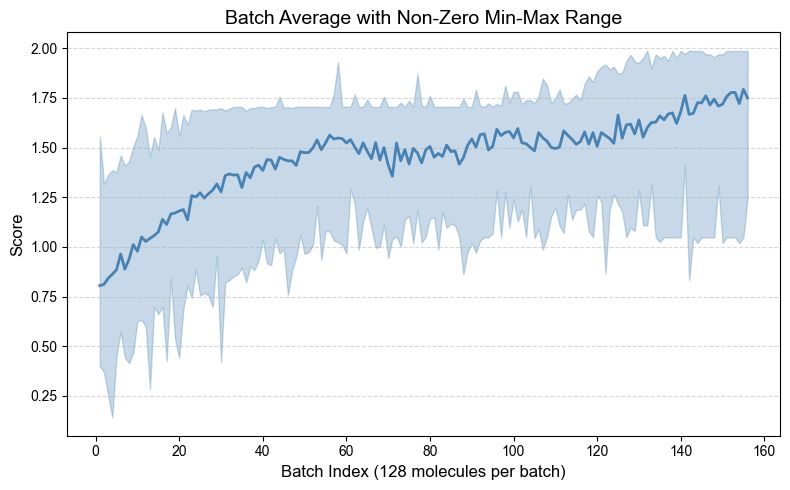

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np

# 设置字体为 Arial，防止负号乱码
rcParams['font.sans-serif'] = ['Arial']
rcParams['axes.unicode_minus'] = False

# 读取CSV文件
df = pd.read_csv("RF+A+300.csv")
df['Index'] = range(1, len(df) + 1)

# 设置 batch 大小
batch_size = 128
num_batches = len(df) // batch_size

# 截断为完整 batch
df_trimmed = df.iloc[:num_batches * batch_size].copy()
df_trimmed['Batch'] = df_trimmed.index // batch_size

# 自定义函数：返回非零最小值
def nonzero_min(series):
    nonzeros = series[series != 0]
    return nonzeros.min() if not nonzeros.empty else 0

# 计算每个 batch 的统计量
batch_stats = df_trimmed.groupby('Batch')['score'].agg([
    ('mean', 'mean'),
    ('min', nonzero_min),
    ('max', 'max')
]).reset_index()
batch_stats['Batch'] += 1  # Batch 从 1 开始

# 绘图
plt.figure(figsize=(8, 5))

# 阴影区域（非零最小值 ~ 最大值）
plt.fill_between(batch_stats['Batch'],
                 batch_stats['min'],
                 batch_stats['max'],
                 color='steelblue',
                 alpha=0.3)

# 平均值折线
plt.plot(batch_stats['Batch'],
         batch_stats['mean'],
         color='steelblue',
         linewidth=2,
         label='Average')

plt.xlabel("Batch Index (128 molecules per batch)", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.title("Batch Average with Non-Zero Min-Max Range", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


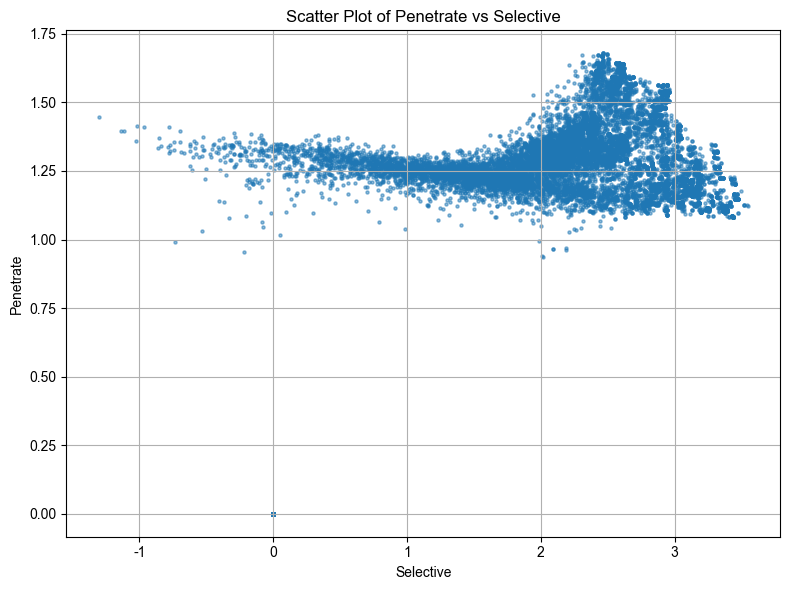

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件（请替换为你的文件路径）
df = pd.read_csv('RF+A+300.csv')

# 提取需要的两列
y = df['Selective']
x = df['Penetrate']

# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(x, y, s=5, alpha=0.5)  # s 控制点的大小，这里设置为 5，alpha 为透明度
plt.xlabel('Selective')
plt.ylabel('Penetrate')
plt.title('Scatter Plot of Penetrate vs Selective')
plt.grid(True)
plt.tight_layout()
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial
findfont: Generic family 'sans-serif' not found because

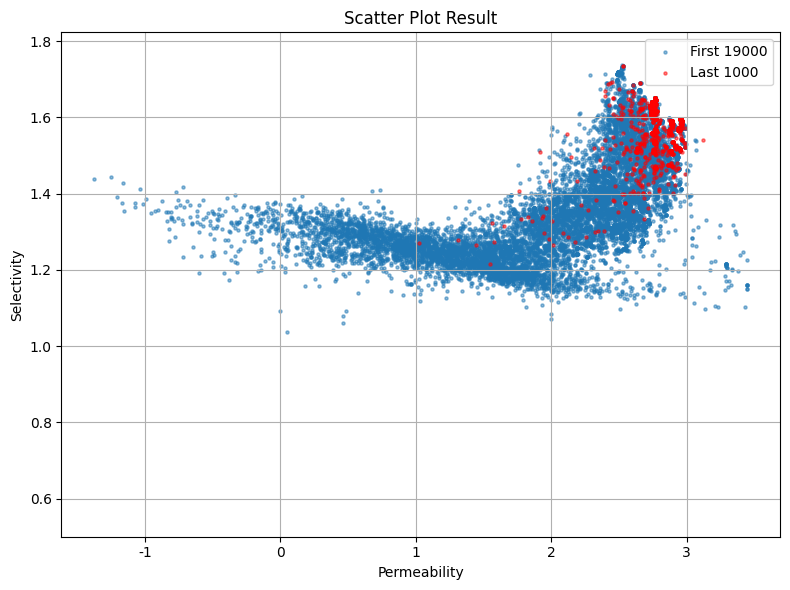

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取CSV文件
df = pd.read_csv('RF+A+350+20000.csv')

# 提取数据
x = df['Penetrate']
y = df['Selective']

# 前18000个点：蓝色
x1 = x[:-1000]
y1 = y[:-1000]

# 后2000个点：红色
x2 = x[-1000:]
y2 = y[-1000:]

# 绘制散点图
plt.figure(figsize=(8, 6))
plt.scatter(x1, y1, s=5, alpha=0.5, label='First 19000')  # 默认蓝色
plt.scatter(x2, y2, s=5, alpha=0.5, color='red', label='Last 1000')  # 红色

plt.xlabel('Permeability')
plt.ylabel('Selectivity')
plt.ylim(bottom=0.5)
plt.title('Scatter Plot Result')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件
df = pd.read_csv('RF+A+300.csv')

# 提取数据
y = df['Selective']
x = df['Penetrate']

# 行号作为颜色映射的基础
colors = np.arange(len(df))

# 绘图
plt.figure(figsize=(9, 6))
scatter = plt.scatter(x, y, c=colors, cmap='viridis', s=5, alpha=0.5)

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Row Index')

plt.xlabel('Permeability')
plt.ylabel('Selectivity')
plt.ylim(bottom=0.6)
plt.title('Scatter Plot Colored by Row Index')
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Selective'

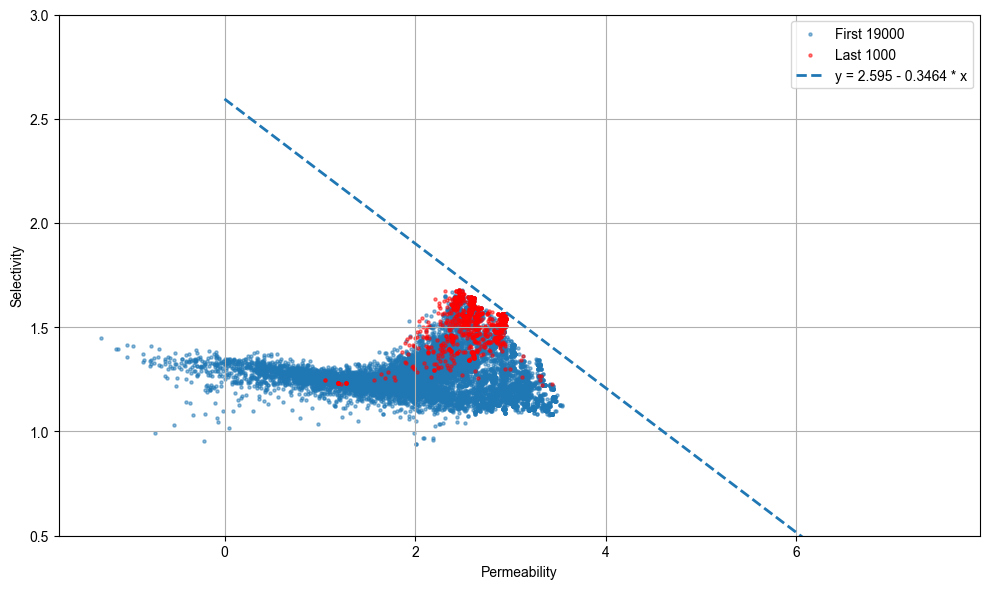

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件
df = pd.read_csv('RF+A+300.csv')

# 提取数据（x 是 logP_CO2，已经取对数）
x = df['Penetrate']
y = df['Selective']

# 前19000个点：蓝色
x1 = x[:-1000]
y1 = y[:-1000]

# 后1000个点：红色
x2 = x[-1000:]
y2 = y[-1000:]

# 拟合线参数
a = 2.595
b = 0.3464
x_line = np.linspace(0, a / b, 500)
y_line = a - b * x_line

# 绘图
plt.figure(figsize=(9, 6))
plt.scatter(x1, y1, s=5, alpha=0.5, label='First 19000')
plt.scatter(x2, y2, s=5, alpha=0.5, color='red', label='Last 1000')
plt.plot(x_line, y_line, linestyle='--', linewidth=2, label='y = 2.595 - 0.3464 * x')

plt.xlabel('Permeability')
plt.ylabel('Selectivity')

# 设置坐标轴从0.5开始
plt.ylim(0.5,3)

plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


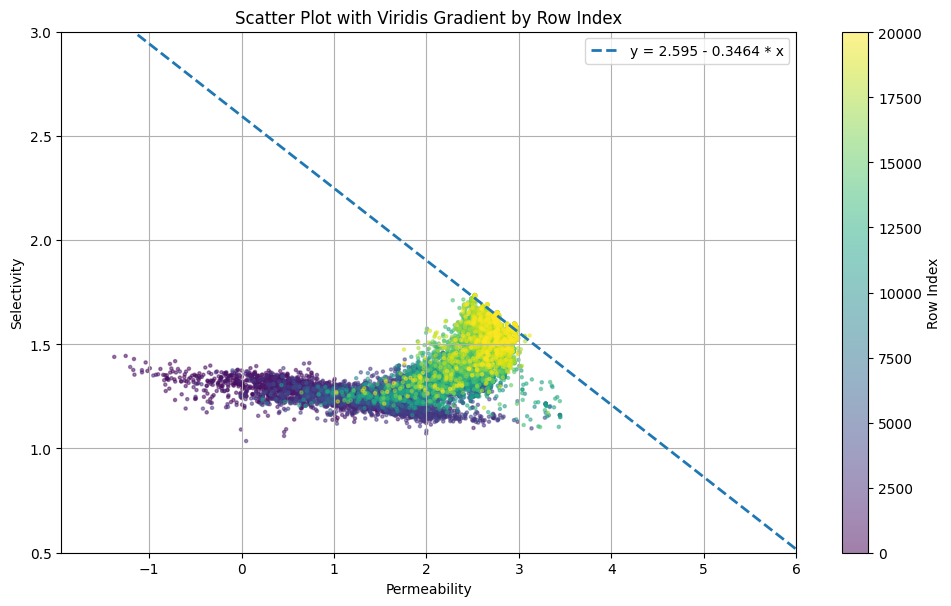

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# 读取CSV文件
df = pd.read_csv('RF+A+350+20000.csv')

# 提取数据
x = df['Penetrate']
y = df['Selective']

# 构建颜色映射（使用行号）
colors = np.arange(len(df))

# 拟合线参数
a = 2.595
b = 0.3464
x_line = np.linspace(-1.5, a / b, 500)
y_line = a - b * x_line

# 绘图
plt.figure(figsize=(10, 6))

# 渐变色散点图
scatter = plt.scatter(x, y, c=colors, cmap='viridis', s=5, alpha=0.5)

# 添加拟合线
plt.plot(x_line, y_line, linestyle='--', linewidth=2, label='y = 2.595 - 0.3464 * x')

# 添加颜色条
cbar = plt.colorbar(scatter)
cbar.set_label('Row Index')

# 坐标轴和图形设置
plt.xlabel('Permeability')
plt.ylabel('Selectivity')
plt.xlim(right=6)
plt.ylim(0.5, 3)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.title('Scatter Plot with Viridis Gradient by Row Index')
plt.show()
